In [472]:
import pandas as pd
import numpy as np


In [473]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv') 

In [474]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [475]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [476]:
movies = movies.rename(columns={'Movie_id': 'id','Keywords': 'keywords', 'Overview': 'overview', 'Vote_average': 'vote_average', 'Popularity': 'popularity', 'Release_date': 'release_date'})

In [477]:
credits.head(1)['cast'].values

array(['[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "ge

In [478]:
movies = movies.merge(credits, on='title', how='left')

In [479]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [480]:
movies['original_language'].value_counts()

original_language
en    4510
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
ko      12
cn      12
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [481]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [482]:
movies = movies[['id', 'title', 'overview', 'genres', 'keywords', 'movie_id',	'cast','crew','vote_average', 'popularity', 'release_date']]

In [483]:
movies.head()

,id,title,overview,genres,keywords,movie_id,cast,crew,vote_average,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9,139.082615,2007-05-19
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3,107.376788,2015-10-26
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6,112.312950,2012-07-16
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1,43.926995,2012-03-07


In [484]:
movies.isnull().sum()

id              0
title           0
overview        3
genres          0
keywords        0
movie_id        0
cast            0
crew            0
vote_average    0
popularity      0
release_date    1
dtype: int64

In [485]:
movies.dropna(inplace=True)

In [486]:
movies.duplicated().sum()

0

In [487]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [488]:
missing_columns = [col for col in movies if col not in movies.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")

In [489]:
'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'


'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [490]:

import ast

In [491]:
def convert(obj):
    try:
        L = []
        for i in ast.literal_eval(obj):
            L.append(i['name'].strip() if isinstance(i.get('name'), str) else 'no_name')
        return L if L else ['no_data']
    except (ValueError, SyntaxError, TypeError):
        return ['no_data']

In [492]:
movies['genres'] = movies['genres'].apply(convert)


In [493]:

movies.head()

,id,title,overview,genres,keywords,movie_id,cast,crew,vote_average,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9,139.082615,2007-05-19
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3,107.376788,2015-10-26
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6,112.312950,2012-07-16
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1,43.926995,2012-03-07


In [494]:
movies['keywords'] = movies['keywords'].apply(convert)

In [495]:
movies.head()

,id,title,overview,genres,keywords,movie_id,cast,crew,vote_average,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9,139.082615,2007-05-19
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3,107.376788,2015-10-26
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6,112.312950,2012-07-16
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1,43.926995,2012-03-07


In [496]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')


[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [497]:
def convert3(obj):
    try:
        L = []
        counter = 0
        for i in ast.literal_eval(obj):
            if counter < 3:
                L.append(i['name'].strip() if isinstance(i.get('name'), str) else 'no_name')
            counter += 1
        return L if L else ['no_data']
    except (ValueError, SyntaxError, TypeError):
        return ['no_data']

In [498]:
movies['cast'] = movies['cast'].apply(convert)

In [499]:
movies.head()

,id,title,overview,genres,keywords,movie_id,cast,crew,vote_average,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9,139.082615,2007-05-19
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3,107.376788,2015-10-26
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",49026,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6,112.312950,2012-07-16
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1,43.926995,2012-03-07


In [500]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [501]:
def fetch_director(obj):
    try:
        L = []
        for i in ast.literal_eval(obj):
            if i.get('job') == 'Director':
                L.append(i['name'].strip() if isinstance(i.get('name'), str) else 'no_director')
                break
        return L if L else ['no_director']
    except (ValueError, SyntaxError, TypeError):
        return ['no_director']

In [502]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [503]:
movies.head()

,id,title,overview,genres,keywords,movie_id,cast,crew,vote_average,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],7.2,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],6.9,139.082615,2007-05-19
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],6.3,107.376788,2015-10-26
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",49026,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],7.6,112.312950,2012-07-16
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],6.1,43.926995,2012-03-07


In [504]:
movies['overview'][3]

"Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's crimes to protect the late attorney's reputation and is subsequently hunted by the Gotham City Police Department. Eight years later, Batman encounters the mysterious Selina Kyle and the villainous Bane, a new terrorist leader who overwhelms Gotham's finest. The Dark Knight resurfaces to protect a city that has branded him an enemy."

In [505]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [506]:
movies.head()

,id,title,overview,genres,keywords,movie_id,cast,crew,vote_average,popularity,release_date
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],7.2,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],6.9,139.082615,2007-05-19
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],6.3,107.376788,2015-10-26
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",49026,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],7.6,112.312950,2012-07-16
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],6.1,43.926995,2012-03-07


In [507]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" " ,"") for i in x])
movies['keywords']= movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [508]:
movies.head()

,id,title,overview,genres,keywords,movie_id,cast,crew,vote_average,popularity,release_date
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],7.2,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],6.9,139.082615,2007-05-19
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",206647,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],6.3,107.376788,2015-10-26
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...",49026,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],7.6,112.312950,2012-07-16
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...",49529,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],6.1,43.926995,2012-03-07


In [509]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew'] 

In [510]:
movies.head()

,id,title,overview,genres,keywords,movie_id,cast,crew,vote_average,popularity,release_date,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],7.2,150.437577,2009-12-10,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],6.9,139.082615,2007-05-19,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",206647,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],6.3,107.376788,2015-10-26,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...",49026,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],7.6,112.312950,2012-07-16,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...",49529,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],6.1,43.926995,2012-03-07,"[John, Carter, is, a, war-weary,, former, mili..."


In [511]:
new_df = movies[['id', 'title', 'tags', 'genres']]

In [512]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))

/var/folders/t9/sj35gj8524580w8yktlf6jqr0000gn/T/ipykernel_18410/1824047427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))


In [513]:
new_df.head()

,id,title,tags,genres
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]"
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]"
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]"
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]"


In [514]:
import nltk

In [515]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [516]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)


In [517]:
new_df['tags'] = new_df['tags'].apply(stem)

/var/folders/t9/sj35gj8524580w8yktlf6jqr0000gn/T/ipykernel_18410/3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [518]:
new_df['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav stephenlang michellerodriguez giovanniribisi joeldavidmoor cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyt scottlawr kellykilgour jamespatrickpitt seanpatrickmurphi peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurri lukehawk woodyschultz petermensah soniaye jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibbi jodielandau julielamm cullenb.madden josephbradymadden frankietorr austinwilson sarawilson tamicawashington-mil lucybri nathanmeist gerryblair matthewchamberlain paulyat wraywil

In [519]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

/var/folders/t9/sj35gj8524580w8yktlf6jqr0000gn/T/ipykernel_18410/3214958533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [520]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem(text):
    return " ".join(ps.stem(i) for i in text.split())
new_df['tags'] = new_df['tags'].apply(stem).apply(lambda x: x.lower())

/var/folders/t9/sj35gj8524580w8yktlf6jqr0000gn/T/ipykernel_18410/4272712765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))
/var/folders/t9/sj35gj8524580w8yktlf6jqr0000gn/T/ipykernel_18410/4272712765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem).apply(lambda x: x.lower())


In [521]:
new_df.head()

,id,title,tags,genres
0,19995,Avatar,"i n t h e 2 2 n d c e n t u r y , a p a r a p ...","[Action, Adventure, Fantasy, ScienceFiction]"
1,285,Pirates of the Caribbean: At World's End,"c a p t a i n b a r b o s s a , l o n g b e l ...","[Adventure, Fantasy, Action]"
2,206647,Spectre,a c r y p t i c m e s s a g f r o m b o n d ’ ...,"[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,f o l l o w t h e d e a t h o f d i s t r i c ...,"[Action, Crime, Drama, Thriller]"
4,49529,John Carter,"j o h n c a r t e r i s a w a r - w e a r y , ...","[Action, Adventure, ScienceFiction]"


In [522]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')


In [576]:
cv = CountVectorizer (max_features=9000, stop_words=None, token_pattern=r'(?u)\b\w+\b') 
 # Custom token pattern
vectors = cv.fit_transform(new_df['tags']).toarray()
print("Vocabulary size:", len(cv.get_feature_names_out()))

Vocabulary size: 141


In [578]:

new_df = new_df.assign(
    vote_average=movies['vote_average'],
    popularity=movies['popularity']
)


new_df['release_year'] = pd.to_datetime(movies['release_date']).dt.year.fillna(0).astype(int)

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
numeric_features = scaler.fit_transform(new_df[['vote_average', 'popularity', 'release_year']])

X = np.hstack([vectors, numeric_features])

In [579]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

X_train, X_test, y_train, y_test = train_test_split(X, new_df['tags'], test_size=0.3, random_state=42)
mlb = MultiLabelBinarizer()
y_train_bin = mlb.fit_transform([[]] if not y_train.any() else y_train)  # Placeholder for genres
y_test_bin = mlb.transform([[]] if not y_test.any() else y_test)

/Users/app/Downloads/AI/movies/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['%', ']', 'ì', 'ę', 'ğ', 'ı', 'ş', 'ū', 'ű', '̇', 'а', 'в', 'к', 'о', 'ј', 'ћ', '任', '务', '卧', '地', '奶', '妈', '帆', '底', '徐', '爆', '级', '绝', '肥', '超', '霸'] will be ignored
  warnings.warn(


In [580]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))


classifier.fit(X_train, y_train_bin)


/Users/app/Downloads/AI/movies/.venv/lib/python3.9/site-packages/sklearn/multiclass.py:90: UserWarning: Label 0 is present in all training examples.
  warnings.warn(
/Users/app/Downloads/AI/movies/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/app/Downloads/AI/movies/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sci

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [581]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [593]:
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
import numpy as np
threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)


print("Genre Classifier Evaluation on Test Set (30%):")
print(f"Accuracy: {accuracy_score(y_test_bin, y_pred):.2f}")
print(f"Precision: {precision_score(y_test_bin, y_pred, average='micro'):.2f}")
print(f"Recall: {recall_score(y_test_bin, y_pred, average='micro'):.2f}")
print(f"F1-Score: {f1_score(y_test_bin, y_pred, average='micro'):.2f}")# Prediction and Evaluation on Test Set (30%)

Genre Classifier Evaluation on Test Set (30%):
Accuracy: 0.20
Precision: 0.98
Recall: 0.97
F1-Score: 0.97


In [529]:
movies.head()

,id,title,overview,genres,keywords,movie_id,cast,crew,vote_average,popularity,release_date,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],7.2,150.437577,2009-12-10,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],6.9,139.082615,2007-05-19,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",206647,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],6.3,107.376788,2015-10-26,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...",49026,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],7.6,112.312950,2012-07-16,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...",49529,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],6.1,43.926995,2012-03-07,"[John, Carter, is, a, war-weary,, former, mili..."


In [530]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/app/Downloads/AI/movies/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


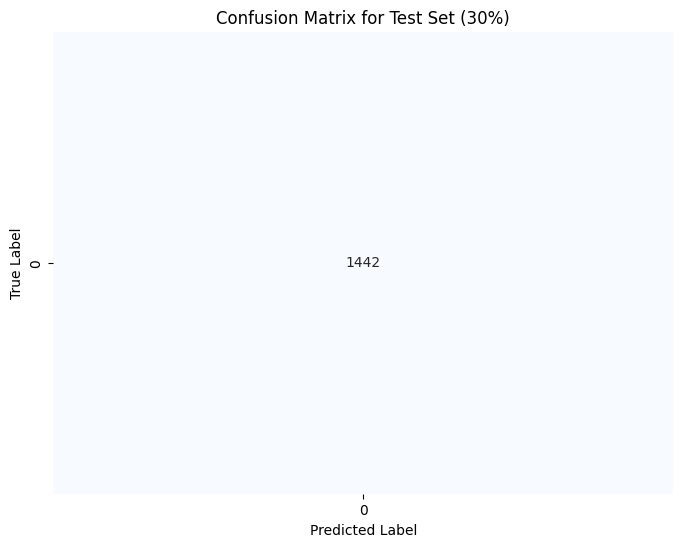

In [531]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Add confusion_matrix here
cm = confusion_matrix(y_test_bin.argmax(axis=1), y_pred.argmax(axis=1))  # Convert multi-label to single label for simplicity
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Test Set (30%)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_test.png')
plt.show()

In [532]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

/Users/app/Downloads/AI/movies/.venv/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/app/Downloads/AI/movies/.venv/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/app/Downloads/AI/movies/.venv/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/app/Downloads/AI/movies/.venv/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/app/Downloads/AI/movies/.venv/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thre

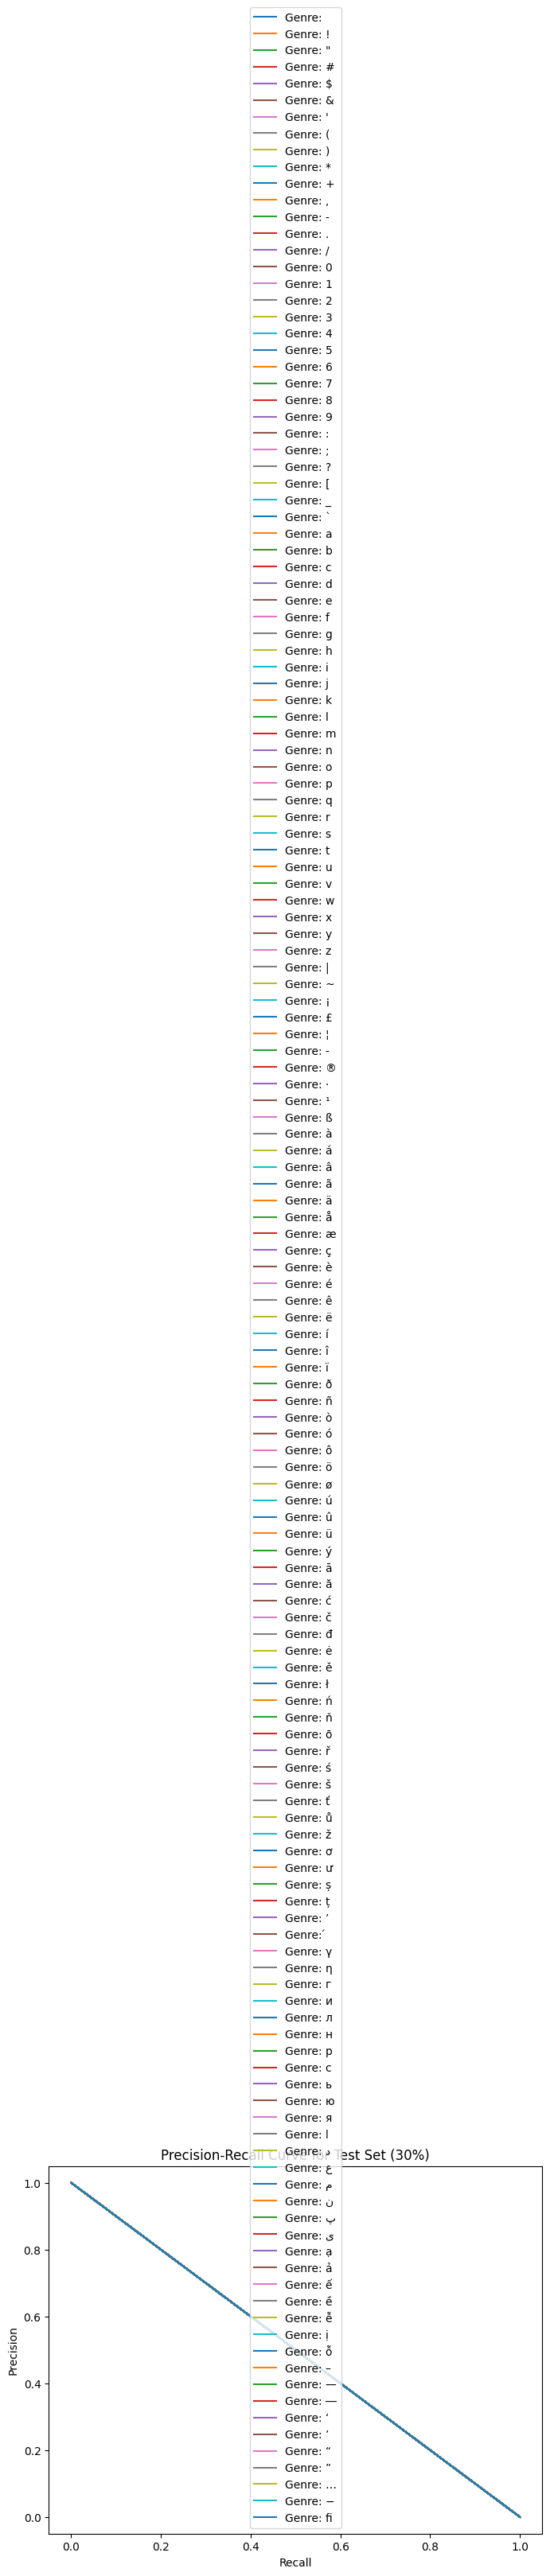

In [533]:
y_test_bin_labels = label_binarize(y_test, classes=mlb.classes_)
y_pred_scores = classifier.decision_function(X_test)

plt.figure(figsize=(8, 6))
for i in range(len(mlb.classes_)):
    precision, recall, _ = precision_recall_curve(y_test_bin_labels[:, i], y_pred_scores[:, i])
    plt.plot(recall, precision, label=f'Genre: {mlb.classes_[i]}')

plt.title('Precision-Recall Curve for Test Set (30%)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.savefig('precision_recall_curve_test.png')
plt.show() #graph 2

In [534]:
import pickle
pickle.dump(classifier, open('genre_classifier.pkl', 'wb'))
pickle.dump(mlb, open('mlb.pkl', 'wb'))

In [535]:
movies_dict = movies[['id', 'title', 'genres', 'vote_average', 'tags', 'overview']].to_dict()  # Add relevant columns
pickle.dump(movies_dict, open('movie_dict.pkl', 'wb'))

In [536]:
vectors

array([[0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 2, ..., 0, 0, 0]])

In [537]:
vectors[4]

array([ 0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0, 79, 11, 34, 31, 66,  8,
        9, 31, 56,  6,  9, 38, 30, 64, 53, 24,  0, 62, 38, 46, 14,  8, 12,
        3, 13,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0])

In [538]:
cv .get_feature_names_out()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '_', 'a', 'b',
       'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o',
       'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '¹', 'ß',
       'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì',
       'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'ö', 'ø', 'ú', 'û', 'ü',
       'ý', 'ā', 'ă', 'ć', 'č', 'đ', 'ė', 'ę', 'ě', 'ğ', 'ı', 'ł', 'ń',
       'ň', 'ō', 'ř', 'ś', 'ş', 'š', 'ť', 'ū', 'ů', 'ű', 'ž', 'ơ', 'ư',
       'ș', 'ț', 'ʼ', 'γ', 'η', 'а', 'в', 'г', 'и', 'к', 'л', 'н', 'о',
       'р', 'с', 'ь', 'ю', 'я', 'ј', 'ћ', 'ا', 'د', 'ع', 'م', 'ن', 'پ',
       'ی', 'ạ', 'ả', 'ế', 'ề', 'ễ', 'ị', 'ỗ', '任', '务', '卧', '地', '奶',
       '妈', '帆', '底', '徐', '爆', '级', '绝', '肥', '超', '霸', 'ﬁ'],
      dtype=object)

In [539]:
import requests

In [540]:
def fetch_poster(id):
    try:
        url = f"https://api.themoviedb.org/3/movie/{id}?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US"
        data = requests.get(url).json()
        poster_path = data.get('poster_path')
        if poster_path:
            poster_url = f"https://image.tmdb.org/t/p/w500/{poster_path}"
        else:
            poster_url = "https://via.placeholder.com/500x750?text=No+Poster"
        return poster_url
    except:
        return "https://via.placeholder.com/500x750?text=Error"

In [541]:
def recommend_tag_based(movie_title, n):
    # Simulated tag-based recommendation
    return [f"{movie_title} - Tag {i}" for i in range(1, n+1)], [f"poster{i}.jpg" for i in range(1, n+1)]

def recommend_by_genre_model(movie_title, n):
    # Simulated genre-based recommendation
    return [f"{movie_title} - Genre {i}" for i in range(1, n+1)], [f"genre_poster{i}.jpg" for i in range(1, n+1)]

In [542]:
def recommend(query, n=5, df=movies):
    # Check for movie title match
    filtered_movies = df[df['title'].str.lower().str.contains(query.lower())]
    if not filtered_movies.empty:
        # Recommend similar movies to the first match
        movie_title = filtered_movies.iloc[0]['title']
        names, posters = recommend_tag_based(movie_title, n)
        return f"Recommendations for movie: {movie_title}", names, posters

    # Check for genre match
    all_genres = set([genre for sublist in df['genres'] for genre in sublist])
    matching_genres = [g for g in all_genres if query.lower() in g.lower()]
    if matching_genres:
        selected_genre = matching_genres[0]
        genre_movies = df[df['genres'].apply(lambda x: selected_genre in x)]
        # Recommend top N movies by rating in this genre
        top_movies = genre_movies.sort_values(by='vote_average', ascending=False).head(n)
        names = top_movies['title'].tolist()
        posters = [fetch_poster(mid) for mid in top_movies['id']]
        return f"Top {n} movies in genre: {selected_genre}", names, posters

    return "No movies or genres found matching your search.", [], []

In [543]:
ps.stem('fantastic')

'fantast'

In [544]:
stem("captain barbossa, long believed to be dead, has come back to life and is headed to the edge of the earth with will turner and elizabeth swann. but nothing is quite as it seems. adventure fantasy action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger johnnydepp orlandobloom keiraknightley stellanskarsgård chowyun-fat billnighy geoffreyrush jackdavenport kevinmcnally tomhollander naomieharris jonathanpryce keithrichards leearenberg mackenziecrook gregellis davidbailie martinklebba davidschofield laurenmaher vanessabranch angusbarnett gilesnew reggielee dominicscottkay takayofischer davidmeunier ho-kwantse andybeckwith peterdonaldbadalamentiii christophers.capp keithrichards hakeemkae-kazim ghassanmassoud goreverbinski")

"captain barbossa, long believ to be dead, ha come back to life and is head to the edg of the earth with will turner and elizabeth swann. but noth is quit as it seems. adventur fantasi action ocean drugabus exoticisland eastindiatradingcompani loveofone'slif traitor shipwreck strongwoman ship allianc calypso afterlif fighter pirat swashbuckl aftercreditssting johnnydepp orlandobloom keiraknightley stellanskarsgård chowyun-fat billnighi geoffreyrush jackdavenport kevinmcn tomholland naomieharri jonathanpryc keithrichard leearenberg mackenziecrook gregelli davidbaili martinklebba davidschofield laurenmah vanessabranch angusbarnett gilesnew reggiele dominicscottkay takayofisch davidmeuni ho-kwants andybeckwith peterdonaldbadalamentiii christophers.capp keithrichard hakeemkae-kazim ghassanmassoud goreverbinski"

In [545]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [546]:
train_df, test_df = train_test_split(new_df, test_size=0.3, random_state=42)
train_vectors = cv.transform(train_df['tags']).toarray()
test_vectors = cv.transform(test_df['tags']).toarray()

In [547]:
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_df['genres'])
y_test = mlb.transform(test_df['genres'])

In [548]:
from sklearn.metrics.pairwise import cosine_similarity

In [549]:
similarity = cosine_similarity(vectors)

In [550]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(443, 0.9953687798293381),
 (998, 0.9953094194375436),
 (1507, 0.9948494927064311),
 (3, 0.9948191968143749),
 (2770, 0.9945660132583122)]

In [551]:
new_df.iloc[1216].title

'Autumn in New York'

In [552]:
pickle.dump(new_df, open('movies.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))
pickle.dump(movies, open('movies_full.pkl', 'wb'))

In [553]:

pickle.dump(new_df.to_dict(),open('movie_dict.pkl','wb'))

In [554]:
new_df.to_dict()

{'id': {0: 19995,
  1: 285,
  2: 206647,
  3: 49026,
  4: 49529,
  5: 559,
  6: 38757,
  7: 99861,
  8: 767,
  9: 209112,
  10: 1452,
  11: 10764,
  12: 58,
  13: 57201,
  14: 49521,
  15: 2454,
  16: 24428,
  17: 1865,
  18: 41154,
  19: 122917,
  20: 1930,
  21: 20662,
  22: 57158,
  23: 2268,
  24: 254,
  25: 597,
  26: 271110,
  27: 44833,
  28: 135397,
  29: 37724,
  30: 558,
  31: 68721,
  32: 12155,
  33: 36668,
  34: 62211,
  35: 8373,
  36: 91314,
  37: 68728,
  38: 102382,
  39: 20526,
  40: 49013,
  41: 44912,
  42: 10193,
  43: 534,
  44: 168259,
  45: 72190,
  46: 127585,
  47: 54138,
  48: 81005,
  49: 64682,
  50: 9543,
  51: 68726,
  52: 38356,
  53: 217,
  54: 105864,
  55: 62177,
  56: 188927,
  57: 10681,
  58: 5174,
  59: 14161,
  60: 17979,
  61: 76757,
  62: 258489,
  63: 411,
  64: 246655,
  65: 155,
  66: 14160,
  67: 15512,
  68: 1726,
  69: 44826,
  70: 8487,
  71: 1735,
  72: 297761,
  73: 2698,
  74: 137113,
  75: 9804,
  76: 14869,
  77: 150540,
  78: 27892

In [555]:
print("\nTag-based Recommendation for 'Avatar':")
print(recommend('Avatar', n=5))

print("\nModel-based Recommendation for 'Avatar':")
print(recommend_by_genre_model('Avatar', n=5))


Tag-based Recommendation for 'Avatar':
('Recommendations for movie: Avatar', ['Avatar - Tag 1', 'Avatar - Tag 2', 'Avatar - Tag 3', 'Avatar - Tag 4', 'Avatar - Tag 5'], ['poster1.jpg', 'poster2.jpg', 'poster3.jpg', 'poster4.jpg', 'poster5.jpg'])

Model-based Recommendation for 'Avatar':
(['Avatar - Genre 1', 'Avatar - Genre 2', 'Avatar - Genre 3', 'Avatar - Genre 4', 'Avatar - Genre 5'], ['genre_poster1.jpg', 'genre_poster2.jpg', 'genre_poster3.jpg', 'genre_poster4.jpg', 'genre_poster5.jpg'])


In [556]:
import matplotlib.pyplot as plt  # Add this import
import seaborn as sns

In [557]:
movies_dict = movies[['id', 'title', 'genres', 'vote_average', 'tags', 'overview']].to_dict()  # Add relevant columns
pickle.dump(movies_dict, open('movie_dict.pkl', 'wb'))

In [558]:
def plot_rating_distribution():
    plt.figure(figsize=(10, 6))
    sns.histplot(movies['vote_average'], bins=20, kde=True, color='blue')
    plt.title('Distribution of Movie Ratings')
    plt.xlabel('Vote Average')
    plt.ylabel('Frequency')
    plt.savefig('rating_distribution.png')
    plt.show()

In [559]:
def plot_genre_distribution():
    genre_counts = pd.Series([genre for sublist in movies['genres'] for genre in sublist]).value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=genre_counts.values[:10], y=genre_counts.index[:10], palette='viridis')
    plt.title('Top 10 Movie Genres Distribution')
    plt.xlabel('Number of Movies')
    plt.ylabel('Genre')
    plt.savefig('genre_distribution.png')
    plt.show()

/var/folders/t9/sj35gj8524580w8yktlf6jqr0000gn/T/ipykernel_18410/2600874639.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values[:10], y=genre_counts.index[:10], palette='viridis')


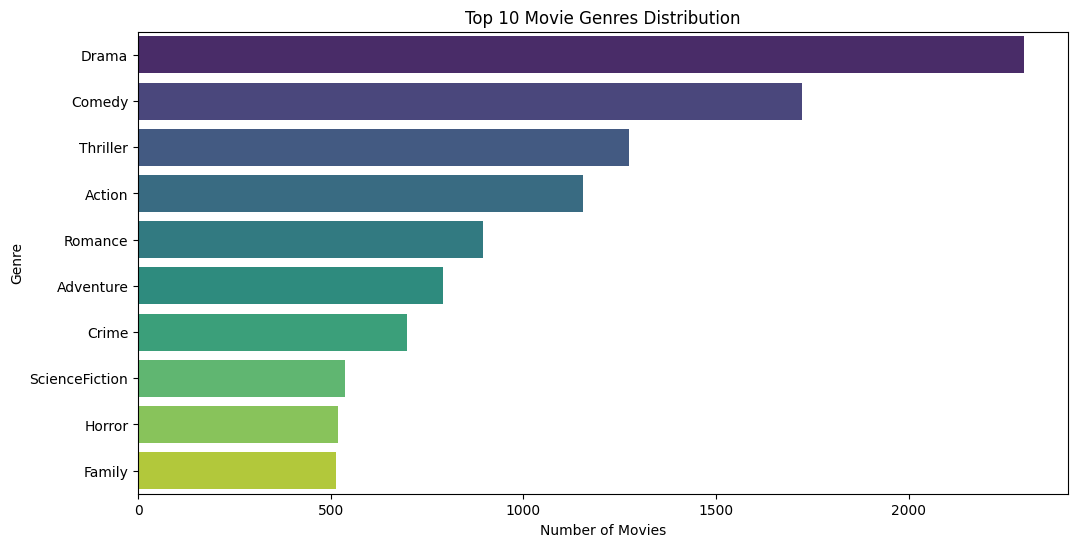

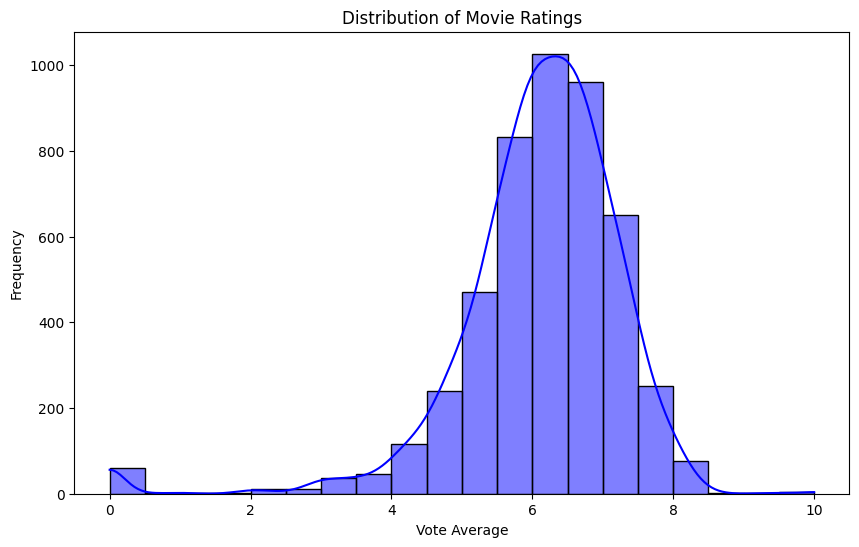

In [560]:
plot_genre_distribution()
plot_rating_distribution()

In [561]:
def evaluate_recommendations(movie, recommend_func, n=5, genre_overlap_threshold=0.5):
    if movie not in new_df['title'].values:
        return None
    
    # Get input movie's genres
    input_genres = set(movies[movies['title'] == movie]['genres'].iloc[0])
    if not input_genres:
        return None
    
    # Define ground truth: movies with >=50% genre overlap
    y_true = []
    for idx, row in movies.iterrows():
        if row['title'] == movie:
            continue
        other_genres = set(row['genres'])
        if not other_genres:
            continue
        overlap = len(input_genres & other_genres) / len(input_genres)
        if overlap >= genre_overlap_threshold:
            y_true.append(row['title'])
    
    if not y_true:
        return None
    
    # Get predicted recommendations
    y_pred = recommend_func(movie, n)
    if not y_pred or y_pred == "Movie not found":
        return None
    
    # Convert to binary labels for sklearn metrics
    all_movies = list(set(y_true + y_pred))
    y_true_binary = [1 if m in y_true else 0 for m in all_movies]
    y_pred_binary = [1 if m in y_pred else 0 for m in all_movies]
    
    # Compute metrics
    precision = precision_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)
    recall = recall_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)
    f1 = f1_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)
    
    return {
        'movie': movie,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'n_recommended': len(y_pred),
        'n_ground_truth': len(y_true),
        'y_true': y_true,
        'y_pred': y_pred,
        'all_movies': all_movies
    }

In [562]:
# Plot evaluation results
def plot_evaluation_results(results, title='Evaluation Metrics'):
    if not results:
        return
    movies = [r['movie'] for r in results]
    precisions = [r['precision'] for r in results]
    recalls = [r['recall'] for r in results]
    f1s = [r['f1'] for r in results]
    
    plt.figure(figsize=(12, 6))
    x = np.arange(len(movies))
    width = 0.25
    plt.bar(x - width, precisions, width, label='Precision', color='blue')
    plt.bar(x, recalls, width, label='Recall', color='red')
    plt.bar(x + width, f1s, width, label='F1-Score', color='green')
    plt.xlabel('Movies')
    plt.ylabel('Score')
    plt.title(title)
    plt.xticks(x, movies, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig('evaluation_results.png')
    plt.show()

In [563]:
# Evaluate recommendations for a random sample of movies
np.random.seed(42)
sample_movies = new_df['title'].sample(5).tolist()
results_tag = []
results_genre = []

In [564]:
# Plot confusion matrix for a single movie
def plot_confusion_matrix(result):
    if not result:
        return
    y_true = [1 if m in result['y_true'] else 0 for m in result['all_movies']]
    y_pred = [1 if m in result['y_pred'] else 0 for m in result['all_movies']]
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {result["movie"]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(f'cm_{result["movie"].replace(" ", "_")}.png')
    plt.show()

In [565]:
if results_tag:
    print("\nEvaluation Results (Tag-Based):")
    for res in results_tag:
        print(f"\nMovie: {res['movie']}")
        print(f"Precision: {res['precision']:.3f}")
        print(f"Recall: {res['recall']:.3f}")
        print(f"F1-Score: {res['f1']:.3f}")
        print(f"Recommended: {res['n_recommended']}, Ground Truth: {res['n_ground_truth']}")
    
    avg_precision = np.mean([r['precision'] for r in results_tag])
    avg_recall = np.mean([r['recall'] for r in results_tag])
    avg_f1 = np.mean([r['f1'] for r in results_tag])
    print("\nAverage Metrics (Tag-Based):")
    print(f"Average Precision: {avg_precision:.3f}")
    print(f"Average Recall: {avg_recall:.3f}")
    print(f"Average F1-Score: {avg_f1:.3f}")

In [566]:
if results_genre:
    print("\nEvaluation Results (Genre-Based):")
    for res in results_genre:
        print(f"\nMovie: {res['movie']}")
        print(f"Precision: {res['precision']:.3f}")
        print(f"Recall: {res['recall']:.3f}")
        print(f"F1-Score: {res['f1']:.3f}")
        print(f"Recommended: {res['n_recommended']}, Ground Truth: {res['n_ground_truth']}")
    
    avg_precision = np.mean([r['precision'] for r in results_genre])
    avg_recall = np.mean([r['recall'] for r in results_genre])
    avg_f1 = np.mean([r['f1'] for r in results_genre])
    print("\nAverage Metrics (Genre-Based):")
    print(f"Average Precision: {avg_precision:.3f}")
    print(f"Average Recall: {avg_recall:.3f}")
    print(f"Average F1-Score: {avg_f1:.3f}")

In [567]:

plot_evaluation_results(results_tag, title='Evaluation Metrics (Tag-Based)')
plot_evaluation_results(results_genre, title='Evaluation Metrics (Genre-Based)')

In [568]:
new_df.to_pickle('movie_data.pkl')

In [569]:
movies.head()

,id,title,overview,genres,keywords,movie_id,cast,crew,vote_average,popularity,release_date,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],7.2,150.437577,2009-12-10,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],6.9,139.082615,2007-05-19,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",206647,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],6.3,107.376788,2015-10-26,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...",49026,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],7.6,112.312950,2012-07-16,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...",49529,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],6.1,43.926995,2012-03-07,"[John, Carter, is, a, war-weary,, former, mili..."
